# Problema Bin Packing - Combinatória
O problema de bin packing (ou "empacotamento em caixas") é um problema clássico de otimização combinatória. O objetivo é organizar um conjunto de itens de diferentes tamanhos em um número mínimo de caixas (ou "bins") de capacidade fixa, de forma que a soma dos tamanhos dos itens em cada caixa não exceda a capacidade da caixa.

Alunos:
- Ruan Tenório de Melo
- Victor Hugo Silva Ângelo
- Vinícius da Costa  Netizke

## Abordagem Utilizada


### Representação

 Representaremos uma potencial solução como uma permutação ordenada dos itens. A ideia é que iremos empacotar os itens de acordo com a ordem especificada pelo cromossomo utilizando a heurística do First Fit.

 Exemplo de Cromossomo: [3, 0, 4, 1, 2] Representa o empacotamento do item 3, depois o item 0, em seguida o item 4 e por assim em diante.


### Função de Aptidão

Utilizaremos o número de bins como o fitness do cromossomo, onde uma menor quantidade de bins indica uma melhor aptidão do cromossomo.

### Seleção de Parentes

Para a seleção dos pais que terão a oportunidade de realizar a operação de crossover utilizamos a ideia do *tournament selection* onde é sorteado aleatoriamente *k* individuos da população e o individuo mais adaptado é selecionado como um pai.

### Cruzamento

A operação de cruzamento, *crossover*, foi definida da seguinte forma:

1. Definimos dois pontos de corte aleatorios e copiamos essa fatia do ```parent1``` para o filho.
2. O restante dos items que o individuo representa virá do ```parent2``` na ordem que eles aparecem no cromossomo.

Esta forma de cruzamento não gera individuos "monstros" pois não há informação nova, apenas a ordem dos elementos é alterada.

### Mutação

Como a nossa representação do cromossomo é uma permutação dos items que serão armazenados nas *bins*, achamos válido que a mutação altere apenas a ordem dos items representados no nosso cromossomo, então são sorteados dois indices e os valores do cromossomo naqueles indices são trocados.

### Condição de parada
O algoritmo é encerrado quando o número máximo de gerações é atingido, garantido que seja encerrado.

## Implementação

In [2]:
import random
import copy
from statistics import mean
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:

def pack_items_first_fit(items, item_order, bin_capacity):
    bins = []
    bin_loads = {}

    for item_index in item_order:
        item_size = items[item_index]
        placed = False

        for bin_idx, current_bin in enumerate(bins):
            current_load = bin_loads.get(bin_idx, 0)
            if current_load + item_size <= bin_capacity:
                current_bin.append(item_index)
                bin_loads[bin_idx] = current_load + item_size
                placed = True
                break

        # Se não foi possível colocar em uma bin existente, cria uma.
        if not placed:
            new_bin_idx = len(bins)
            bins.append([item_index])
            bin_loads[new_bin_idx] = item_size

    return bins, bin_loads


In [ ]:
def calculate_fitness(chromosome, items, bin_capacity):
    packed_bins, _ = pack_items_first_fit(items, chromosome, bin_capacity)
    return len(packed_bins)


In [ ]:
def initialize_population(pop_size, num_items):
    population = []
    base_permutation = list(range(num_items))

    for _ in range(pop_size):
        chromosome = random.sample(base_permutation, num_items)
        population.append(chromosome)
    return population

In [ ]:
def tournament_selection(population, fitnesses, k=3):
    tournament = random.sample(list(zip(population, fitnesses)), k)
    tournament.sort(key=lambda x: x[1])
    return tournament[0][0]

In [ ]:
def order_crossover(parent1, parent2):
    size = len(parent1)
    child = [-1] * size

    start, end = sorted(random.sample(range(size), 2))

    child[start:end+1] = parent1[start:end+1]
    slice_items = set(parent1[start:end+1])

    current_pos = (end + 1) % size
    parent2_idx = (end + 1) % size

    while child[current_pos] == -1:
        item = parent2[parent2_idx]
        if item not in slice_items:
            child[current_pos] = item
            current_pos = (current_pos + 1) % size
        parent2_idx = (parent2_idx + 1) % size

    return child

In [ ]:
def swap_mutation(chromosome, mutation_rate):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(chromosome)), 2)
        chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
    return chromosome

In [ ]:
def genetic_algorithm_bpp(items, bin_capacity, pop_size=100, generations=100,
                           crossover_rate=0.8, mutation_rate=0.1, tournament_size=3,
                           elitism_count=1):
    num_items = len(items)
    population = initialize_population(pop_size, num_items)
    best_chromosome = None
    best_fitness = float('inf')
    population_means = []
    population_best_fitness = []

    print(f"Starting GA for Bin Packing...")
    print(f"Items ({num_items}): {items}")
    print(f"Bin Capacity: {bin_capacity}")
    print(f"Population Size: {pop_size}, Generations: {generations}")
    print("-" * 30)

    for gen in range(generations):
        fitnesses = [calculate_fitness(chrom, items, bin_capacity) for chrom in population]

        population_means.append(mean(fitnesses))

        current_best_idx = min(range(pop_size), key=lambda i: fitnesses[i])
        current_best_fitness = fitnesses[current_best_idx]
        current_best_chromosome = population[current_best_idx]

        population_best_fitness.append(current_best_fitness)

        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_chromosome = copy.deepcopy(current_best_chromosome)
            print(f"Generation {gen+1}: New best fitness = {best_fitness}")

        next_population = []

        sorted_pop_indices = sorted(range(pop_size), key=lambda i: fitnesses[i])
        for i in range(elitism_count):
            elite_idx = sorted_pop_indices[i]
            next_population.append(copy.deepcopy(population[elite_idx]))

        while len(next_population) < pop_size:
            # Selection
            parent1 = tournament_selection(population, fitnesses, tournament_size)
            parent2 = tournament_selection(population, fitnesses, tournament_size)

            # Crossover
            if random.random() < crossover_rate:
                child1 = order_crossover(parent1, parent2)
            else:
                child1 = ccparent1)

            # Mutation
            child1 = swap_mutation(child1, mutation_rate)

            next_population.append(child1)

            if len(next_population) >= pop_size:
                break

        population = next_population

    print("-" * 30)
    print("GA Finished.")
    print(f"Best Fitness (Minimum Bins): {best_fitness}")
    print(f"Best Item Order Found: {best_chromosome}")
    print("Corresponding Packing:")

    packed_bins_final, bin_loads_final = pack_items_first_fit(items, best_chromosome, bin_capacity)
    for i, bin_items in enumerate(packed_bins_final):
        bin_item_sizes = [items[idx] for idx in bin_items]
        print(f"  Bin {i+1} (Load: {bin_loads_final[i]}/{bin_capacity}): Items {bin_items} -> Sizes {bin_item_sizes}")

    return best_chromosome, best_fitness, packed_bins_final, population_means, population_best_fitness

In [ ]:
# items_to_pack = [4, 8, 1, 4, 2, 1, 5, 6, 3, 7]
    # bin_capacity_val = 10

items_to_pack = [57,30,8,98,94,71,28,69,14,64,51,68,23,67,89,16,41,5,52,87,39,3,48,74,23,34,56,37,24,98,59,27,43,98,61,66,58,98,3,3,93,98,64,7,10,39,90,4,67,85,55,79,62,7,26,84,51,14,79,15,48,6,88,93,54,42,97,28,68,93,55,2,96,2,97,32,29,67,60,6,78,99,24,50,84,8,97,68,19,92,96,5,78,97,97,100,30,78,10,41,1,56,96,4,99,75,54,76,70,62,62,4,66,60,15,1,5,13,95,59,54,4,54,58,56,91,60,25,70,6,53,13,53,51,35,68,71,94,88,57,19,77,67,22,53,33,70,71,29,28,66,42,100,91,65,4,67,77,73,18,7,5,9,18,61,88,34,8,60,98,27,65,56,89,11,45,12,58,96,98,23,57,9,94,71,63,84,30,8,98,94,71,28,69,14,64,51,68,23,67,89,16,41,5,52,87,39,3,4,30,8,98,94,71,28,69,14,64,51,68,23,67,89,16,41,5,52,87,39,3,4,30,8,98,94,71,28,69,14,64,51,68,23,67,89,16,41,5,52,87,39,3,4,68,55,73,74,34,65,33,59,67,78,3,72,43]
bin_capacity_val = 100

# items_to_pack = [5, 7, 5, 2, 4, 2, 5, 1, 6]
# bin_capacity_val = 10

POP_SIZE = 100
GENERATIONS = 100
CROSSOVER_RATE = 0.85
MUTATION_RATE = 0.50
TOURNAMENT_SIZE = 2
ELITISM_COUNT = 1

best_order, min_bins, final_packing, population_means, population_best_fitness = genetic_algorithm_bpp(
    items_to_pack,
    bin_capacity_val,
    pop_size=POP_SIZE,
    generations=GENERATIONS,
    crossover_rate=CROSSOVER_RATE,
    mutation_rate=MUTATION_RATE,
    tournament_size=TOURNAMENT_SIZE,
    elitism_count=ELITISM_COUNT
)

Starting GA for Bin Packing...
Items (266): [57, 30, 8, 98, 94, 71, 28, 69, 14, 64, 51, 68, 23, 67, 89, 16, 41, 5, 52, 87, 39, 3, 48, 74, 23, 34, 56, 37, 24, 98, 59, 27, 43, 98, 61, 66, 58, 98, 3, 3, 93, 98, 64, 7, 10, 39, 90, 4, 67, 85, 55, 79, 62, 7, 26, 84, 51, 14, 79, 15, 48, 6, 88, 93, 54, 42, 97, 28, 68, 93, 55, 2, 96, 2, 97, 32, 29, 67, 60, 6, 78, 99, 24, 50, 84, 8, 97, 68, 19, 92, 96, 5, 78, 97, 97, 100, 30, 78, 10, 41, 1, 56, 96, 4, 99, 75, 54, 76, 70, 62, 62, 4, 66, 60, 15, 1, 5, 13, 95, 59, 54, 4, 54, 58, 56, 91, 60, 25, 70, 6, 53, 13, 53, 51, 35, 68, 71, 94, 88, 57, 19, 77, 67, 22, 53, 33, 70, 71, 29, 28, 66, 42, 100, 91, 65, 4, 67, 77, 73, 18, 7, 5, 9, 18, 61, 88, 34, 8, 60, 98, 27, 65, 56, 89, 11, 45, 12, 58, 96, 98, 23, 57, 9, 94, 71, 63, 84, 30, 8, 98, 94, 71, 28, 69, 14, 64, 51, 68, 23, 67, 89, 16, 41, 5, 52, 87, 39, 3, 4, 30, 8, 98, 94, 71, 28, 69, 14, 64, 51, 68, 23, 67, 89, 16, 41, 5, 52, 87, 39, 3, 4, 30, 8, 98, 94, 71, 28, 69, 14, 64, 51, 68, 23, 67, 89, 16, 41, 5

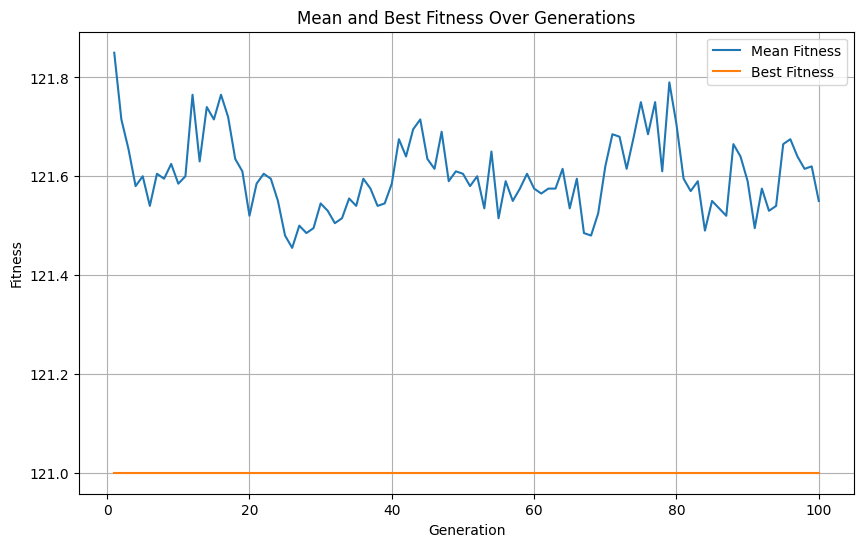

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, GENERATIONS + 1), population_means, label='Mean Fitness')
plt.plot(range(1, GENERATIONS + 1), population_best_fitness, label='Best Fitness')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Mean and Best Fitness Over Generations')

plt.legend()

plt.grid(True)
plt.show()
